# Zadanie 3

## Metody redukcji wariancji

Zapoznaj się z metodami redukcji wariancji w metodach Monte Carlo. W szczególności skupimy się na dwóch metodach:

- metoda odbić lustrzanych
- metoda zmiennej kontrolnej

Krok 1.  
Metodą Monte Carlo oblicz całkę

$$ \int_{0}^{1} \frac{4}{1 + x^2} dx $$

(szacowanie liczby $\pi$)

Krok 2.  
Zastosuj jedną z metod redukcji wariancji do ponownego obliczenia zadanej całki.

Krok 3.  
Przedstaw analizę błędu względem ilości symulacji w formie tabeli lub wykresu.


## Implementacja metody Monte Carlo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mc(
        n: int
        ) -> float:
    '''
        Oblicza całkę z treści zadania metodą Monte Carlo
        
        Parametry:
        n: liczba powtórzeń symulacji
        
        Zwraca:
        Wartość całki (oszacowanie liczby pi)'''
    x = np.random.uniform(size=n)
    f = 4 / (1 + (x ** 2))
    return np.mean(f)

## Implementacja metody odbić lustrzanych

In [4]:
def antithetic(
        n: int
        ) -> float:
    '''
        Oblicza całkę z treści zadania metodą odbić lustrzanych
        
        Parametry:
        n: liczba powtórzeń symulacji
        
        Zwraca:
        Wartość całki (oszacowanie liczby pi)
        '''
    U = np.random.uniform(size=n)
    antithetic_U = 1 - U
    f = 4 / (1 + (U ** 2))
    antithetic_f = 4 / (1 + (antithetic_U ** 2))
    f = (antithetic_f + f) / (2 * n)
    return np.sum(f)

## Porównanie błędu standardowego

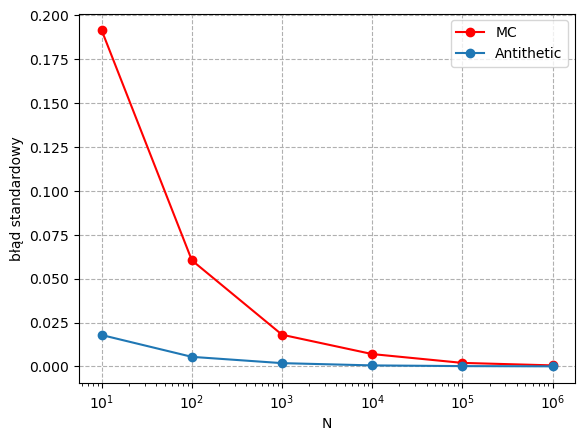

In [5]:
Ns = [10, 100, 1000, 10000, 100000, 1000000]

mc_errors = []
an_errors = []

for n in Ns:
    mc_sum = []
    an_sum = []
    for i in range(100):
        mc_sum.append(mc(n))
        an_sum.append(antithetic(n))
    mc_errors.append(np.std(mc_sum))
    an_errors.append(np.std(an_sum))

plt.plot(Ns, mc_errors, label='MC', color='red', marker='o')
plt.plot(Ns, an_errors, label='Antithetic', marker='o')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('błąd standardowy')
plt.grid(linestyle='--')
plt.legend()
plt.show()
